## Write a short review of the paper: A. van de Walle, C. Nataraj, Z.K. Liu , “The Thermodynamic Database Database”, Calphad 61 (2018) 173-178. 
https://doi.org/10.1016/j.calphad.2018.04.003

There are multiple free sources of thermodynamic data available online, be it handbooks or supplementary information included with research papers. These data, which are stored in files with the “thermodynamic database” (TDB) format, are widely used for thermodynamic modeling as they provide a complete thermodynamic description of a system. Additionally, these files can be readily read or imported into most modeling software. However, most of these files are scattered and difficult to retrieve, necessitating the use of commercial databases. The Thermodynamic Database Database is a search engine that indexes these freely available files and gives researchers a platform to access these files through links to the source. The database of TDB files was generated by combining the data from CALPHAD journal’s complementary section, the NIMS database, the NIST materials data repository and several open databases. The number of data entries was 766 at the time of publication of the paper but is expected to be more as it is updated periodically. The system also allows for easy bibliographical citation in any format as each data source is matched to the DOI of the paper it belongs to. As the system only points to the resource where the data is located, it ensures that copyright and terms of service of the data sources were respected. The minimalistic user interface of the website makes it easy to view in both large and small screens like mobiles. The web interface also has the added benefit of providing a quick preview of the system’s phase diagram using the OpenCalphad software, which can be downloaded and visualized offline. The system hopes to improve upon its current functionalities by supporting more file formats, using the pycalphad toolkit for plotting phase diagrams, links to commercial databases and extractingtabular data from older thermodynamic papers. Thus, the efforts in developing the Thermodynamic Database Database will be instrumental in facilitating the development of future CALPHAD models and also enable CALPHAD-based materials discovery and optimization.

## Thermodynamic modeling of the Mo-V system

The TDB file for the system was retrieved from http://cpddb.nims.go.jp/cpddb/mo-elem/mov/mov_bra.TDB. The original paper can be found at https://doi.org/10.1016/s0364-5916(02)00057-3

The Jupyter notebook for the calculations can be found at https://github.com/dovahkiin0022/MATSE-580/tree/master/MATSE_580_Project

We begin by making the necessary imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate, equilibrium, ReferenceState, Model, binplot, variables as v
from PT import PT_phase_diagram
from binary_helpers import plot_convex_hull

Next, we load the database from the TDB file and check if the database gets loaded properly by printing the elements and the phases in the TDB file. We store the elements in the 'comps' variable and the phases in the 'phases' variable as lists

In [2]:
db_mov = Database('mov_bra.TDB')

In [3]:
print(sorted(db_mov.elements))

['/-', 'MO', 'V', 'VA']


In [4]:
print(sorted(db_mov.phases))

['BCC_A2', 'LIQUID']


In [5]:
comps = ['MO', 'V', 'VA']
phases = ['LIQUID', 'BCC_A2']

## Calculating the heat capacity, entropy, enthalpy and Gibbs energy of each pure element as a function of temperature.

### Molar Gibbs free energy for Mo

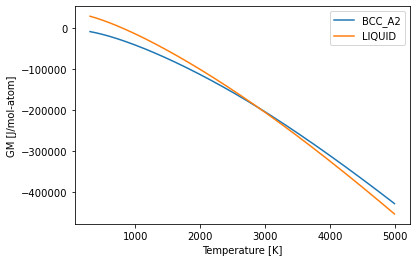

In [6]:
bcc_GM = calculate(db_mov, ['MO', 'VA'], 'BCC_A2', P=101325, T=(300, 5000, 10), N=1,output='GM')
liquid_GM = calculate(db_mov, ['MO', 'VA'], 'LIQUID', P=101325, T=(300, 5000, 10), N=1,output='GM')

# Squeeze is required because the array corresponding to GM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(bcc_GM.T, bcc_GM.GM.squeeze(), label='BCC_A2')
plt.plot(liquid_GM.T, liquid_GM.GM.squeeze(), label='LIQUID')
plt.xlabel("Temperature [K]")
plt.ylabel("GM [J/mol-atom]")
plt.legend()

### Molar Heat capacity for Mo

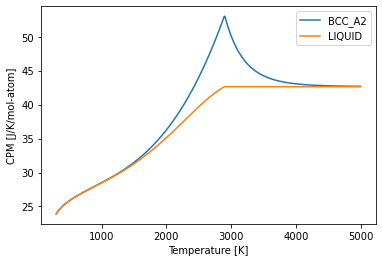

In [7]:
bcc_CPM = calculate(db_mov, ['MO', 'VA'], 'BCC_A2', P=101325, T=(300, 5000, 10), N=1,output='CPM')
liquid_CPM = calculate(db_mov, ['MO', 'VA'], 'LIQUID', P=101325, T=(300, 5000, 10), N=1,output='CPM')

# Squeeze is required because the array corresponding to GM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(bcc_CPM.T, bcc_CPM.CPM.squeeze(), label='BCC_A2')
plt.plot(liquid_CPM.T, liquid_CPM.CPM.squeeze(), label='LIQUID')
plt.xlabel("Temperature [K]")
plt.ylabel("CPM [J/K/mol-atom]")
plt.legend()

### Molar entropy of Mo

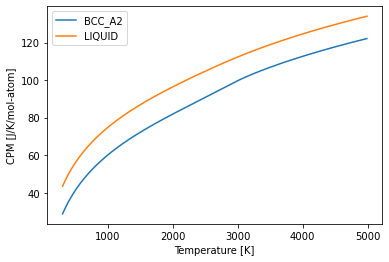

In [8]:
bcc_SM = calculate(db_mov, ['MO', 'VA'], 'BCC_A2', P=101325, T=(300, 5000, 10), N=1,output='SM')
liquid_SM = calculate(db_mov, ['MO', 'VA'], 'LIQUID', P=101325, T=(300, 5000, 10), N=1,output='SM')

# Squeeze is required because the array corresponding to GM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(bcc_SM.T, bcc_SM.SM.squeeze(), label='BCC_A2')
plt.plot(liquid_SM.T, liquid_SM.SM.squeeze(), label='LIQUID')
plt.xlabel("Temperature [K]")
plt.ylabel("CPM [J/K/mol-atom]")
plt.legend()

### Molar enthalpy of Mo

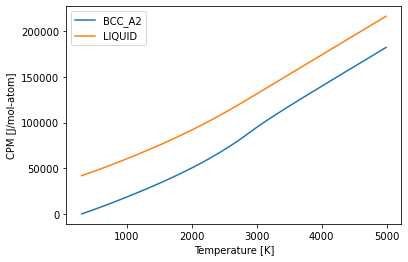

In [9]:
bcc_HM = calculate(db_mov, ['MO', 'VA'], 'BCC_A2', P=101325, T=(300, 5000, 10), N=1,output='HM')
liquid_HM = calculate(db_mov, ['MO', 'VA'], 'LIQUID', P=101325, T=(300, 5000, 10), N=1,output='HM')

# Squeeze is required because the array corresponding to GM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(bcc_HM.T, bcc_HM.HM.squeeze(), label='BCC_A2')
plt.plot(liquid_HM.T, liquid_HM.HM.squeeze(), label='LIQUID')
plt.xlabel("Temperature [K]")
plt.ylabel("CPM [J/mol-atom]")
plt.legend()

### Molar Gibbs energy of V

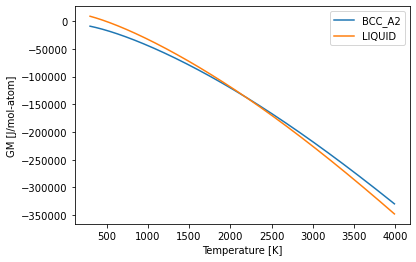

In [10]:
bcc_GM = calculate(db_mov, ['V', 'VA'], 'BCC_A2', P=101325, T=(300, 4000, 10), N=1,output='GM')
liquid_GM = calculate(db_mov, ['V', 'VA'], 'LIQUID', P=101325, T=(300, 4000, 10), N=1,output='GM')

# Squeeze is required because the array corresponding to GM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(bcc_GM.T, bcc_GM.GM.squeeze(), label='BCC_A2')
plt.plot(liquid_GM.T, liquid_GM.GM.squeeze(), label='LIQUID')
plt.xlabel("Temperature [K]")
plt.ylabel("GM [J/mol-atom]")
plt.legend()

### Molar Heat capacity of V

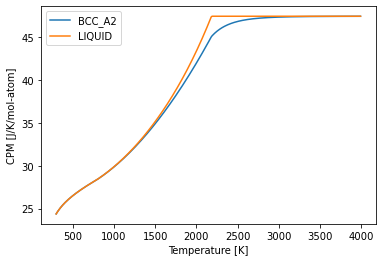

In [11]:
bcc_CPM = calculate(db_mov, ['V', 'VA'], 'BCC_A2', P=101325, T=(300, 4000, 10), N=1,output='CPM')
liquid_CPM = calculate(db_mov, ['V', 'VA'], 'LIQUID', P=101325, T=(300, 4000, 10), N=1,output='CPM')

# Squeeze is required because the array corresponding to GM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(bcc_CPM.T, bcc_CPM.CPM.squeeze(), label='BCC_A2')
plt.plot(liquid_CPM.T, liquid_CPM.CPM.squeeze(), label='LIQUID')
plt.xlabel("Temperature [K]")
plt.ylabel("CPM [J/K/mol-atom]")
plt.legend()

### Molar entropy of V

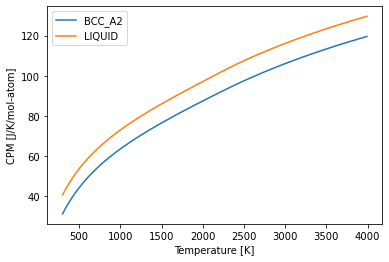

In [12]:
bcc_SM = calculate(db_mov, ['V', 'VA'], 'BCC_A2', P=101325, T=(300, 4000, 10), N=1,output='SM')
liquid_SM = calculate(db_mov, ['V', 'VA'], 'LIQUID', P=101325, T=(300, 4000, 10), N=1,output='SM')

# Squeeze is required because the array corresponding to GM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(bcc_SM.T, bcc_SM.SM.squeeze(), label='BCC_A2')
plt.plot(liquid_SM.T, liquid_SM.SM.squeeze(), label='LIQUID')
plt.xlabel("Temperature [K]")
plt.ylabel("CPM [J/K/mol-atom]")
plt.legend()

### Molar enthalpy of V

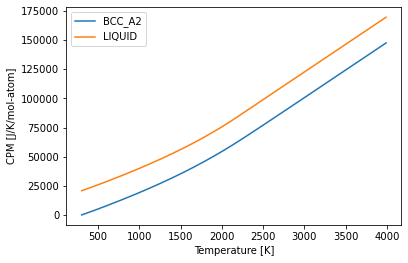

In [13]:
bcc_HM = calculate(db_mov, ['V', 'VA'], 'BCC_A2', P=101325, T=(300, 4000, 10), N=1,output='HM')
liquid_HM = calculate(db_mov, ['V', 'VA'], 'LIQUID', P=101325, T=(300, 4000, 10), N=1,output='HM')

# Squeeze is required because the array corresponding to GM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(bcc_HM.T, bcc_HM.HM.squeeze(), label='BCC_A2')
plt.plot(liquid_HM.T, liquid_HM.HM.squeeze(), label='LIQUID')
plt.xlabel("Temperature [K]")
plt.ylabel("CPM [J/K/mol-atom]")
plt.legend()

## Calculating the phase fractions as a function of temperature for the alloy with 50/50 of each element.

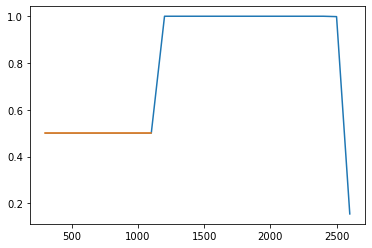

In [14]:
eq_result = equilibrium(db_mov, comps , phases, {v.X('V'):(0,1,0.02), v.T: (300, 4000, 100), v.P:101325}, output='HM')
plt.plot(eq_result.T, eq_result.NP.where(eq_result.Phase=='BCC_A2').sel(P=101325, X_V=0.5).squeeze(), label='BCC_A2')

## Calculating the enthalpy of formation as a function of composition at 298K


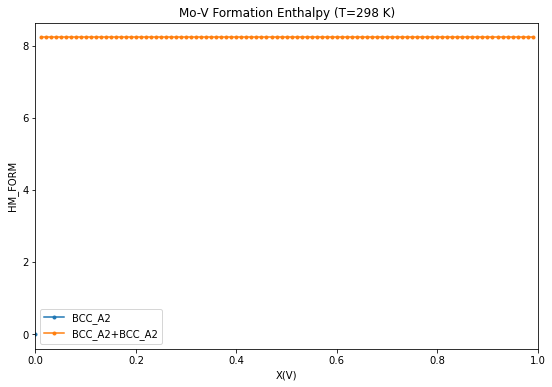

In [15]:
Mo_ref = ReferenceState("MO", "BCC_A2", {v.T: 298.15, v.P: 101325})
V_ref = ReferenceState("V", "BCC_A2", {v.T: 298.15, v.P: 101325})


eq_models = {}
for phase_name in phases:
    mod = Model(db_mov, comps, phase_name)
    mod.shift_reference_state([Mo_ref, V_ref], db_mov)
    eq_models[phase_name] = mod

conds = {v.P: 101325, v.T: 298.15, v.X("V"): (0, 1, 0.01)}
result = equilibrium(db_mov, comps, phases, conds, output="HMR", model=eq_models)

unique_phase_sets = np.unique(result.Phase.values.squeeze(), axis=0)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for phase_set in unique_phase_sets:
    label = '+'.join([ph for ph in phase_set if ph != ''])
    unique_phase_idx = np.nonzero(np.all(result.Phase.values.squeeze() == phase_set, axis=1))[0]
    masked_result = result.isel(X_V=unique_phase_idx)
    ax.plot(masked_result.X_V.squeeze(), masked_result.HMR.squeeze(), marker='.', label=label)
ax.set_xlim((0, 1))
ax.set_xlabel('X(V)')
ax.set_ylabel('HM_FORM')
ax.set_title('Mo-V Formation Enthalpy (T=298 K)')
ax.legend()
plt.show()

## Calculating the enthalpy of mixing in the liquid phase at a high temperature (T = 3500 K)

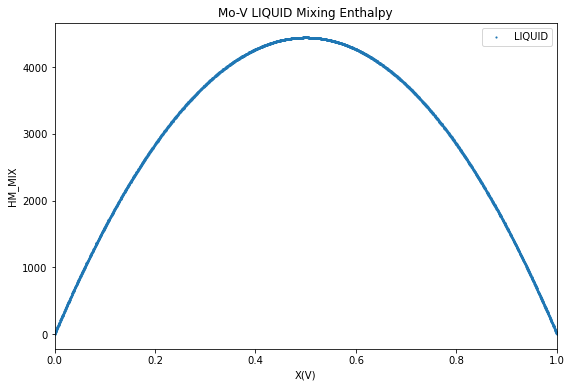

In [16]:
Mo_ref = ReferenceState("MO", "LIQUID")
V_ref = ReferenceState("V", "LIQUID")
liq_refstates = [Mo_ref, V_ref]

mod_liq = Model(db_mov, comps, "LIQUID")
mod_liq.shift_reference_state(liq_refstates, db_mov)
calc_models = {"LIQUID": mod_liq}

result = calculate(db_mov, comps, "LIQUID", P=101325, T=3500, output="HMR", model=calc_models)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.scatter(result.X.sel(component='V'), result.HMR, marker='.', s=5, label='LIQUID')
ax.set_xlim((0, 1))
ax.set_xlabel('X(V)')
ax.set_ylabel('HM_MIX')
ax.set_title('Mo-V LIQUID Mixing Enthalpy')
ax.legend()
plt.show()

## Calculating the binary phase diagram 

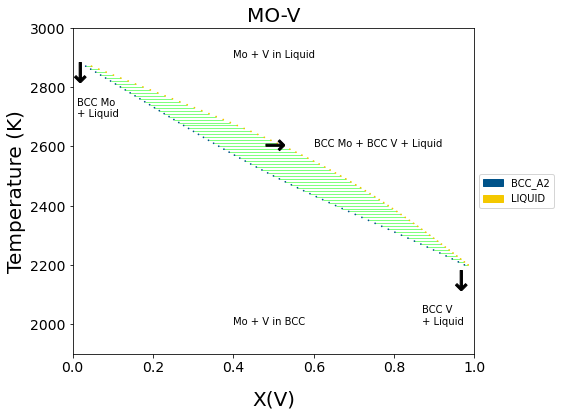

In [17]:
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

binplot(db_mov, comps , phases, {v.X('V'):(0,1,0.02), v.T: (300, 4000, 10), v.P:101325, v.N: 1}, plot_kwargs={'ax': axes})
axes.set_ylim([1900,3000])
plt.text(0.4,2000,'Mo + V in BCC')
plt.text(0.4,2900,'Mo + V in Liquid')
plt.plot(0.5,2600, 'ko', marker=r'$\rightarrow$', markersize=20)
plt.text(0.6,2600,'BCC Mo + BCC V + Liquid')
plt.plot(0.01,2850, 'ko', marker=r'$\downarrow$', markersize=20)
plt.text(0.01,2700, 'BCC Mo'+"\n"+'+ Liquid')
plt.plot(0.96,2150, 'ko', marker=r'$\downarrow$', markersize=20)
plt.text(0.87,2000, 'BCC V'+"\n"+'+ Liquid')
plt.show()